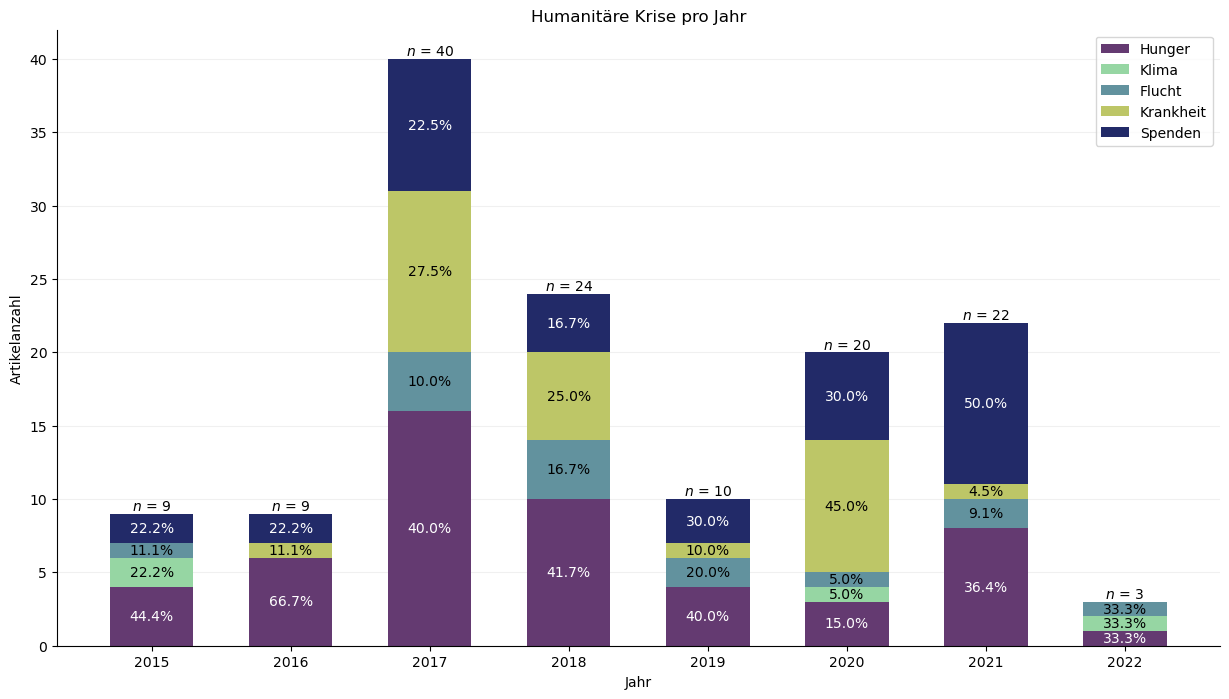

In [3]:
import matplotlib.pyplot as plt
import numpy as np

data = {'2015': [4, 2, 1, 0, 2],
 '2016': [6, 0, 0, 1, 2],
 '2017': [16, 0, 4, 11, 9],
 '2018': [10, 0, 4, 6, 4],
 '2019': [4, 0, 2, 1, 3],
 '2020': [3, 1, 1, 9, 6],
 '2021': [8, 0, 2, 1, 11],
 '2022': [1, 1, 1, 0, 0]}

weight_counts = {}
for i, topic in enumerate(["Hunger", "Klima", "Flucht", "Krankheit", "Spenden"]):
    weight_counts[topic] = np.array([v[i] for _, v in  data.items()])





days = list(data.keys())
width = 0.6


fig, ax = plt.subplots()

bottom = np.zeros(len(days))

# pastell und blau
# colors = ["#F2BAC9", "#222A68", "#79B791"]
# mit 
# colors = ["#F2BAC9", "#222A68", "#62929E"]
# colors = ["#BDC667", "#222A68", "#62929E"]
#

#colors = ["#643A71", "#96D6A3", "#62929E","#BDC667", "#222A68"]

colors = ["#28393D", "#CCF5FF", "#89C7D6","#57828C", "#46646C"]


for i, pack in enumerate(weight_counts.items()):
    boolean=pack[0]
    weight_count=pack[1]
    p = ax.bar(days, weight_count, width, label=boolean, bottom=bottom, color=colors[i])
    bottom += weight_count


ax.set_title('Humanitäre Krise pro Jahr')

ax.legend(loc="upper right")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

def get_hundret_percent(i):
    result = 0
    for _, vals in weight_counts.items():
        result += vals[i]
    return result 

def get_position(weight_counts, i, reason):
    result = 0
    for r, vals in weight_counts.items():
        if r == reason:
            break
        else:
            result += vals[i]
    result += weight_counts[reason][i]/2
    return result
        



for i, day in enumerate(days):
    hundret = get_hundret_percent(i)
    num = sum([x[i] for x in weight_counts.values()])
    plt.text(i , num + 0.5 , "$n$ = " + str(num) , 
                            va = 'center', ha = 'center', rotation = 0, fontsize = 10
                            )

    for reason in weight_counts.keys():
        percentage = weight_counts[reason][i]/hundret * 100
        perc_string = str(np.round(percentage, 1))+ '%'
        pos = get_position(weight_counts, i, reason)
        if perc_string != "0.0%":
            if reason != "Hunger" and reason != "Spenden":
                plt.text(i , pos , perc_string , 
                            va = 'center', ha = 'center', rotation = 0, fontsize = 10
                            )
            else:
                plt.text(i , pos , perc_string , 
                            va = 'center', ha = 'center', rotation = 0, fontsize = 10, color="white"
                            )
                


fig.set_figheight(8)

fig.set_figwidth(15)
plt.xlabel("Jahr")
plt.ylabel("Artikelanzahl")

ax.set_axisbelow(True)

plt.grid(axis="y", which="major", linestyle="-", color='#f0f0f0')

plt.savefig('humanitare-krise-pro-jahr.png', dpi=300, bbox_inches='tight')


In [18]:
import json

with open("t.json","r") as f:
    data = json.load(f)